In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
bs = load_boston()

In [52]:
dataframe= pd.DataFrame(bs.data, columns=bs.feature_names)
#target = pd.DataFrame(bs.target, columns=["Val"])
bias= np.ones(shape=(len(bs.data),1))
dataframe['Bias']= bias 
np.hstack((bs.data, bias))
X = bs.data
y = bs.target[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dataframe.head()
#y

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Bias
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1.0


In [53]:
#linear regression
def compute_cost(X, y, params):
    #num houses in h=boston
    n_samples = len(y)
    #matrix multiplication of features(dot)params
    h = X @ params
    #Mean Squared Error Cost Function
    #n_samples= total vals(sums up to this point, h=expected y vals, y=actual y vals
    return (1/(2*n_samples))*np.sum((h-y)**2)

In [54]:
def gradient_descent(X, y, params, learning_rate=.01, n_iters=300):
    n_samples = len(y)
    #History of cost function
    Cost_history = np.zeros((n_iters,1))
    
    for i in range(n_iters):
        #new params=old params val- learning rate/num vals * partial derivative of X Transpose
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y) 
        #Calc cost with new params val
        Cost_history[i] = compute_cost(X, y, params)

    return (Cost_history, params)
#Can spec. default vals (look at n_iters)

In [55]:
#Data Prep stage
#Normalize vals into proportional vals between 0-1
n_samples = len(y)
#Find mean & std of X
mu = np.mean(X)
sigma = np.std(X)
#Normalizing Moments Eq= mean/stdDev
X = (X-mu) / sigma
#Add new vals back to X
X = np.hstack((np.ones((n_samples,1)),X))
n_features = np.size(X,1)
params = np.zeros((n_features,1))

In [131]:
#Num times to run gradient descent
n_iters = 3000
#Learning rate for gradient descent
learning_rate = .0005
print("Original Cost:", compute_cost(X,y, params))
#Call gradient descent
(Cost_history, optimal_params) = gradient_descent(X, y, params, learning_rate, n_iters)
#Print optimal params
print("Optimal parameters are: \n", optimal_params, "\n")
#Ending cost is?
print(f"Final cost is: {Cost_history[-1]}")
#plot cost function
#plt.plot(range(len(Cost_history)), Cost_history, 'r')
#plt.xlabel("N_Iterations")
#plt.ylabel("Cost")
plt.title("Linear Regression Coefficients")
plt.plot(optimal_params,alpha=0.7,linestyle='none',
         marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = .1$',zorder=7)

Original Cost: 296.0734584980237
Optimal parameters are: 
 [[ 3.11634330e+00]
 [-1.69371085e+00]
 [-4.99705849e-01]
 [-1.56235560e+00]
 [-1.49898822e+00]
 [-1.49672295e+00]
 [-1.32357472e+00]
 [-9.50685581e-01]
 [-1.37914714e+00]
 [-1.59028676e+00]
 [-5.19017555e-03]
 [-1.21295481e+00]
 [ 6.46814767e+00]
 [-1.69140415e+00]] 



TypeError: unsupported format string passed to numpy.ndarray.__format__

In [117]:
#Cross Validation, SKLearn regression, CVs use MSE (mean squared error)
skReg= LinearRegression().fit(X_train, y_train)
print(np.mean(cross_val_score(skReg, X, y, cv=5)))

0.35327592439594435


 10
0.7243749880696093


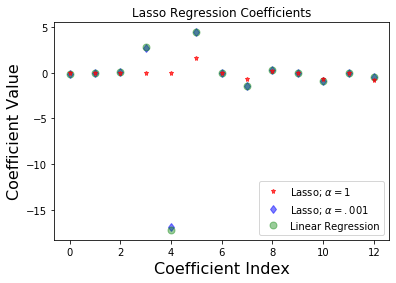

In [138]:
#Lasso Regression (alpha defaults to 1)
#Useful for feature selection, sets unneeded features to 0, adds constant lambda term (sum of coefficient vals*lambda) 
#to cost function
#if predictors(features)>observations(data points) only n (observation) predictors selected even if all predictors are useful
lassoReg= Lasso()
lassoReg.fit(X_train, y_train)
coeff_used = np.sum(lassoReg.coef_!=0)
lassoRegTrainAcc= lassoReg.score(X_train, y_train)
lassoRegTestAcc= lassoReg.score(X_test, y_test)
print("", coeff_used)
plt.title("Lasso Regression Coefficients")
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Value',fontsize=16)
plt.plot(lassoReg.coef_,alpha=0.7,linestyle='none',
         marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7)


#lasso pt.2
lassoReg2=Lasso(alpha=.001, max_iter=10e5)
lassoReg2.fit(X_train, y_train)
lassoRegTrainAcc2= lassoReg.score(X_train, y_train)
lassoRegTestAcc2= lassoReg.score(X_test, y_test)
#print(f"num coefficients {lassoReg2.coef_}")

plt.plot(np.hstack(lassoReg2.coef_),alpha=0.5,linestyle='none',marker='d',
         markersize=6,color='blue',label=r'Lasso; $\alpha = .001$')


#Linear Regression from SKLearn
skReg= LinearRegression().fit(X_train, y_train)
plt.plot(np.hstack(skReg.coef_),alpha=0.4,linestyle='none',
         marker='o',markersize=7,color='green',label='Linear Regression')
plt.legend()


#CV
print(np.mean(cross_val_score(lassoReg2, X_train, y_train, cv=5)))

0.6960840548212719


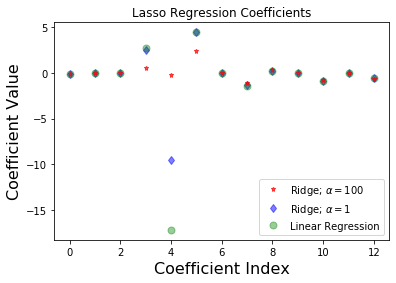

In [139]:
#Ridge
#Adds additional term based on sum of coefficient squares
#Brings coefficient values closer to 0
#Avoids observation issue from Lasso
#Can group colinear predictors together
ridgeReg= Ridge(100, max_iter=10e5)
ridgeReg.fit(X_train, y_train)
#ridgeRegTrainAcc= lassoReg.score(X_train, y_train)
#ridgeRegTestAcc= lassoReg.score(X_test, y_test)
plt.title("Lasso Regression Coefficients")
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Value',fontsize=16)
plt.plot(np.hstack(ridgeReg.coef_),alpha=0.7,linestyle='none',marker='*',
         markersize=5,color='red',label=r'Ridge; $\alpha = 100$',zorder=7)


#Ridge pt2
ridgeReg2= Ridge(1, max_iter=10e5)
ridgeReg2.fit(X_train, y_train)
ridgeRegTrainAcc2= lassoReg.score(X_train, y_train)
ridgeRegTestAcc2= lassoReg.score(X_test, y_test)
plt.plot(np.hstack(ridgeReg2.coef_),alpha=0.5,linestyle='none',marker='d',
         markersize=6,color='blue',label=r'Ridge; $\alpha = 1$') 


#Linear Regression from SKLearn
skReg= LinearRegression().fit(X_train, y_train)
plt.plot(np.hstack(skReg.coef_),alpha=0.4,linestyle='none',
         marker='o',markersize=7,color='green',label='Linear Regression')
plt.legend()


#CV
print(np.mean(cross_val_score(ridgeReg, X_train, y_train, cv=5)))

-0.27731974860561576


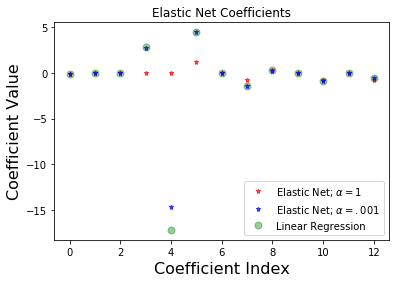

In [129]:
#Elastic Net
#Combination of Lasso/Ridge regularization sum of squares lambda term and lambda term from lasso
#Larger overhead
elasticNet= ElasticNet()
elasticNet.fit(X_train, y_train)
plt.title("Elastic Net Coefficients")
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Value',fontsize=16)
plt.plot(np.hstack(elasticNet.coef_),alpha=0.7,linestyle='none',marker='*',
         markersize=5,color='red',label=r'Elastic Net; $\alpha = 1$',zorder=7)
#Elastic Net 2
elasticNet2= ElasticNet(.001, max_iter= 10e5)
elasticNet2.fit(X_train, y_train)
plt.title("Elastic Net Coefficients")
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Value',fontsize=16)
plt.plot(np.hstack(elasticNet2.coef_),alpha=0.7,linestyle='none',marker='*',
         markersize=5,color='blue',label=r'Elastic Net; $\alpha = .001$',zorder=7)
#Linear Regression from SKLearn
skReg= LinearRegression().fit(X_train, y_train)
plt.plot(np.hstack(skReg.coef_),alpha=0.4,linestyle='none',
         marker='o',markersize=7,color='green',label='Linear Regression')
plt.legend()


#CV
print(np.mean(cross_val_score(elasticNet, X_train, y_train, cv=5)))